![zad9](img/zad9.png)

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import pandas as pd

In [35]:
dx1 = lambda x, y: (y**2*np.log(x) - y) / x
y_true = lambda x: 1/(np.log(x) + 1)
a = 1
b = 2
h = 0.05
y_1 = 1

# Метод Эйлера-Коши

In [36]:
x = [a]
y = [1]

while x[-1] < b:
    y.append(y[-1] + h*dx1(x[-1], y[-1]))
    x.append(x[-1] + h)

pd.DataFrame(y, index=x, columns=["y"])

,y
1.00,1.000000
1.05,0.950000
1.10,0.906859
1.15,0.869201
1.20,0.836000
1.25,0.806476
1.30,0.780023
1.35,0.756161
1.40,0.734511
1.45,0.714761


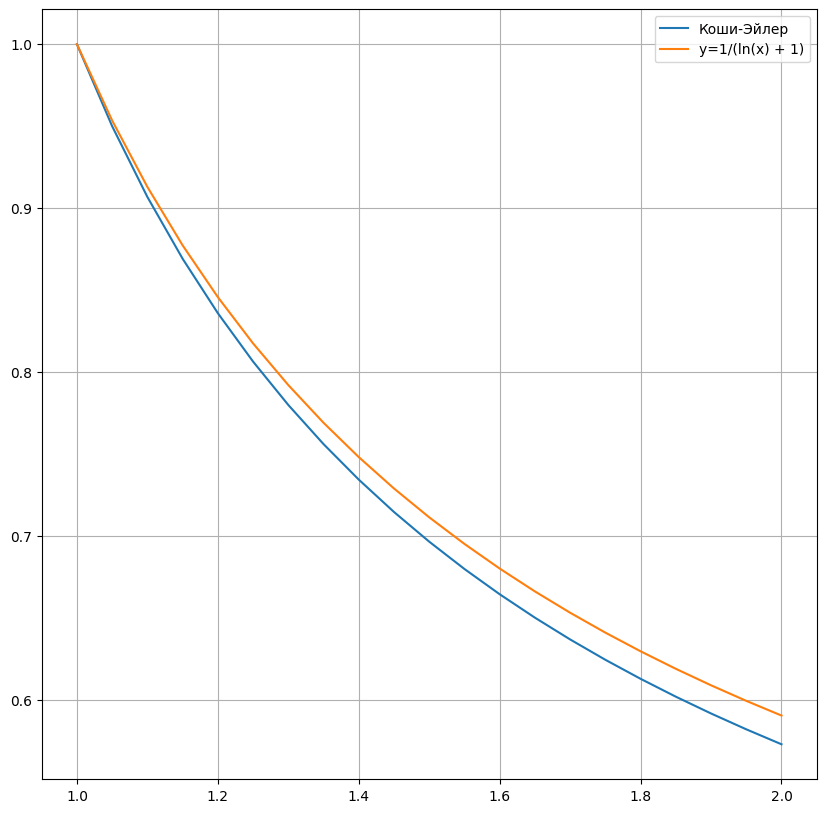

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, label="Коши-Эйлер")

x_true_range = np.linspace(a, b, len(x))
y_true_range = y_true(x_true_range)
ax.plot(x_true_range, y_true_range, label=f'y=1/(ln(x) + 1)')

ax.grid()
ax.legend()

### Наибольшая погрешность в конце отрезка

In [40]:
error = abs(y[-1] - y_true_range[-1])
error

np.float64(0.017518877575046332)

# Метод Рунге-Кутта

In [51]:
x = [1]
y = [1]

while x[-1] < b:
    k1 = dx1(x[-1], y[-1])
    k2 = dx1(x[-1] + (h/2), y[-1] + h*k1/2)
    k3 = dx1(x[-1] + h / 2, y[-1] + h*k2/2)
    k4 = dx1(x[-1] + h, y[-1] + h*k3)

    y.append(y[-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4))
    x.append(x[-1] + h)

pd.DataFrame(y, index=x, columns=['y'])

,y
1.00,1.000000
1.05,0.953480
1.10,0.912983
1.15,0.877376
1.20,0.845794
1.25,0.817565
1.30,0.792164
1.35,0.769169
1.40,0.748238
1.45,0.729095


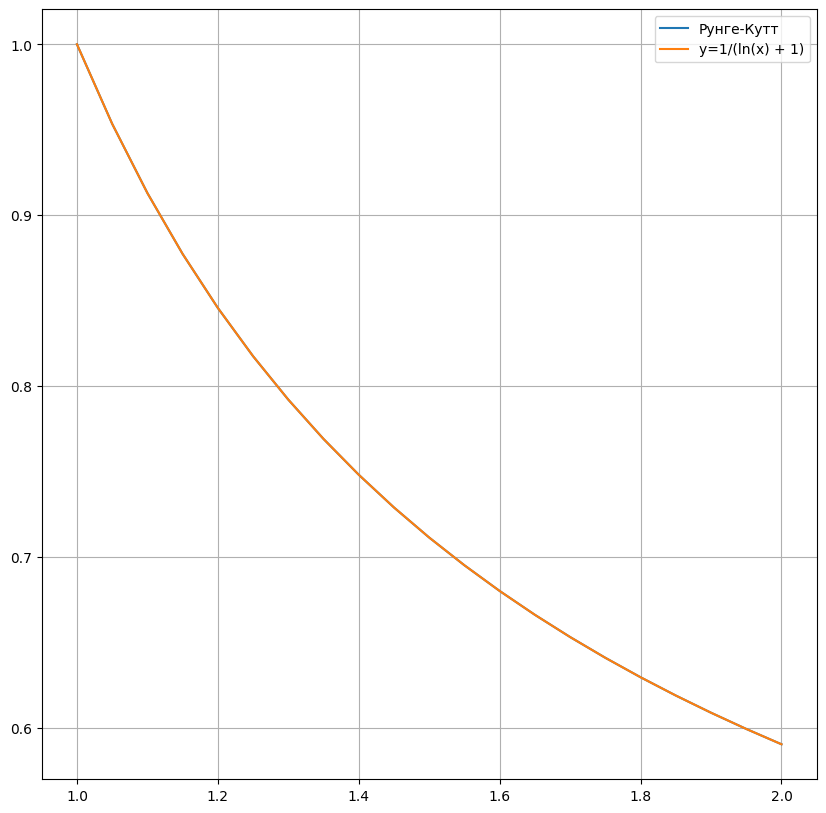

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, label=f'Рунге-Кутт')
ax.plot(x_true_range, y_true_range, label=f'y=1/(ln(x) + 1)')

ax.grid()
ax.legend()

In [52]:
error = abs(y[-1] - y_true_range[-1])
error

np.float64(3.828544625772423e-08)